# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn import datasets

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
data=pd.read_csv('breast-cancer-wisconsin-data.csv')
data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
data.shape

(699, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [6]:
data.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [8]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

data.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [9]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
#Checking for any special characters/undesired data in the dataset
for i in data.columns:
    print(i,'=',pd.unique(data[i]))

ID = [ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572  1047630  1048672
  1049815  1050670  1050718  1054590  1054593  1056784  1057013  1059552
  1065726  1066373  1066979  1067444  1070935  1071760  1072179  1074610
  1075123  1079304  1080185  1081791  1084584  1091262  1096800  1099510
  1100524  1102573  1103608  1103722  1105257  1105524  1106095  1106829
  1108370  1108449  1110102  1110503  1110524  1111249  1112209  1113038
  1113483  1113906  1115282  1115293  1116116  1116132  1116192  1116998
  1117152  1118039  1120559  1121732  1121919  1123061  1124651  1125035
  1126417  1131294  1132347  1133041  1133136  1136142  1137156  1143978
  1147044  1147699  1147748  1148278  1148873  1152331  1155546  1156272
  1156948  1157734  1158247  1160476  1164066  1165297  1165790  1165926
  1166630  1166654  1167439  1167471  1168359  1168736  1169049  1170419
  1170420  1171710  1171795  1171845  1172152 

In [10]:
data['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [11]:
print(data[data['Bare Nuclei']=='?'].shape)
data[data['Bare Nuclei']=='?']

(16, 11)


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [12]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
'''
We can drop using the following
data.drop(data[data['Bare Nuclei'] == '?'].index,inplace=True)
print(data.shape)
data['Bare Nuclei'] = data['Bare Nuclei'].astype('int64')
print(data.info())'''

data['Bare Nuclei']=data['Bare Nuclei'].replace('?','1')

In [13]:
data['Bare Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [15]:
data['Bare Nuclei']=data['Bare Nuclei'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


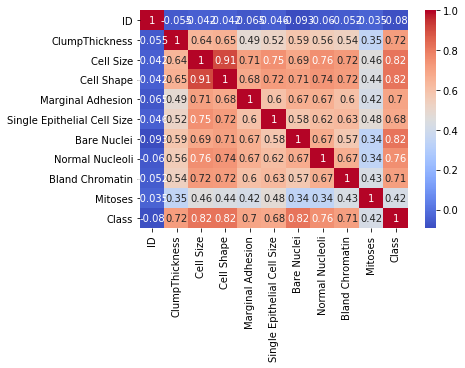

In [16]:
# Check for correlation of variable
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [17]:
data.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [18]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\PratikDiablo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\PratikDiablo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


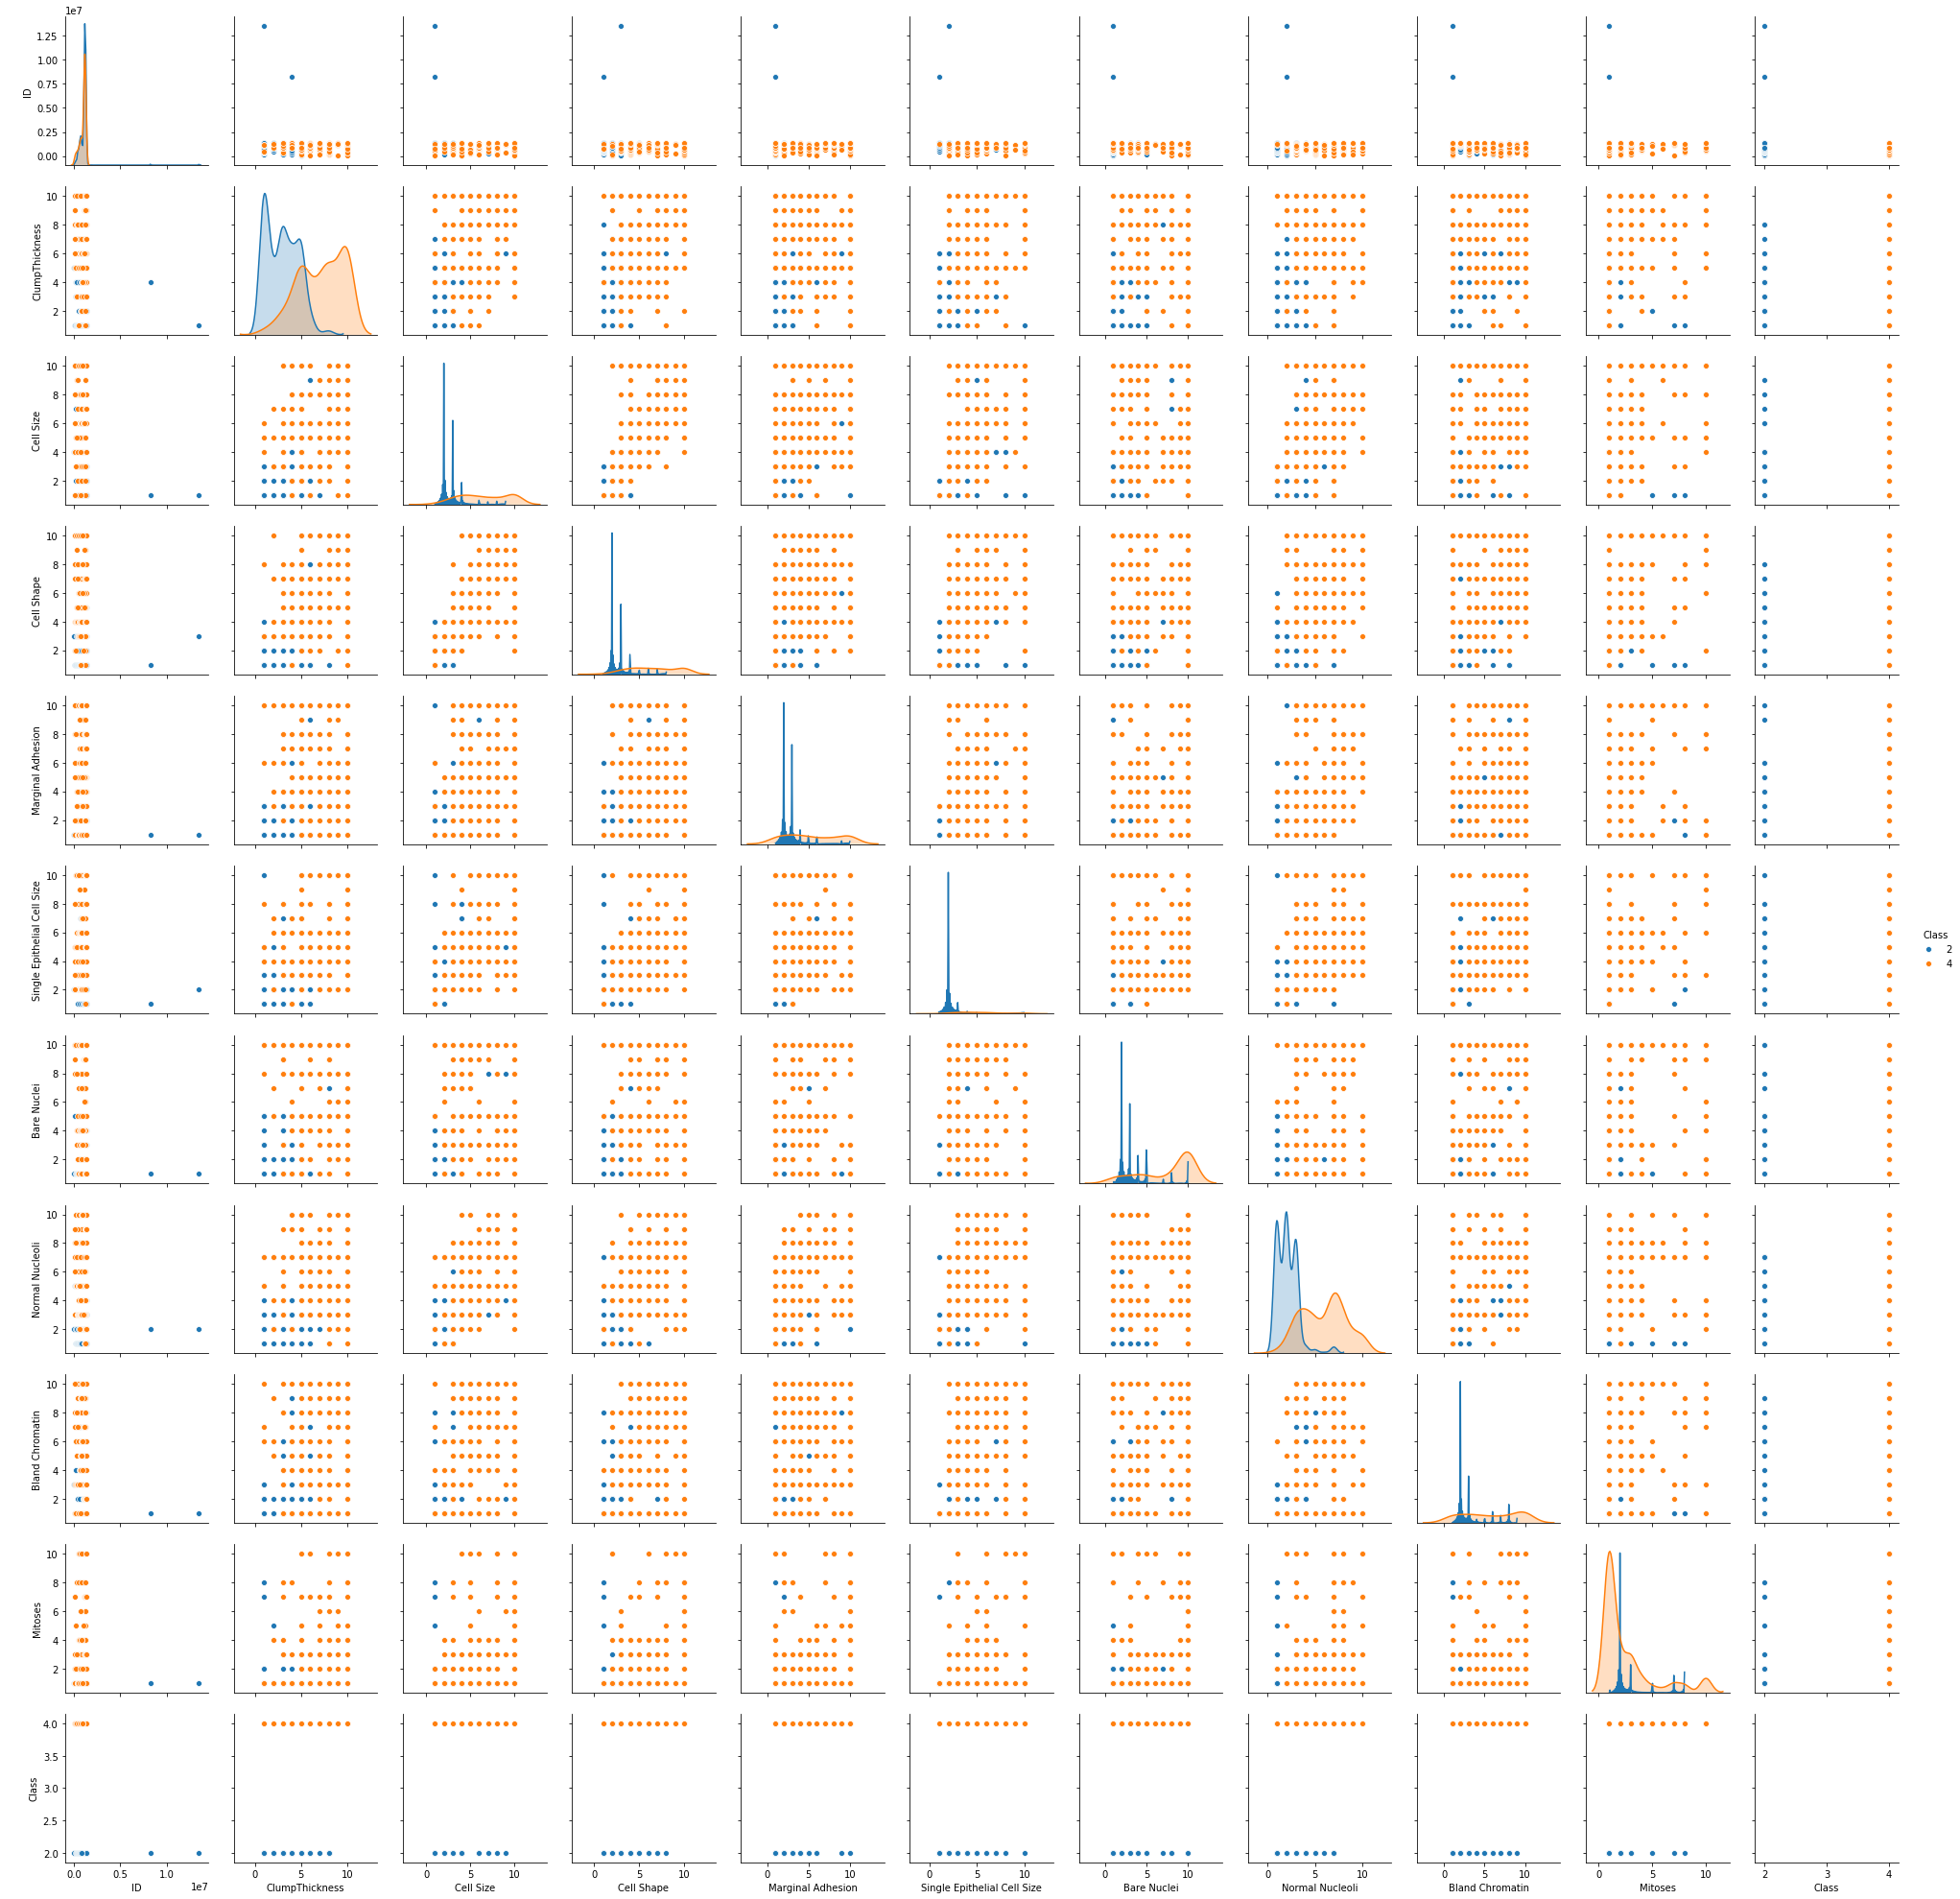

In [19]:
#Let us check for pair plots
sns.pairplot(data,hue='Class',diag_kind='kde')

In [20]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [21]:
data.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [22]:
data.shape

(699, 11)

In [23]:
data.duplicated().sum()

9

In [24]:
data.drop_duplicates(inplace=True)

In [25]:
data.shape

(690, 11)

In [26]:
# We could see most of the outliers are now removed.
for col in data.columns:
    print(col)
    q3,q1=np.percentile(data[col],[75,25])
    print(q3)
    print(q1)
    IQR=q3-q1
    print('IQR is =',IQR)
    lower_bound = q1 -(1.5 * IQR) 
    upper_bound = q3 +(1.5 * IQR) 
    print('Lower bound =', lower_bound)
    print('Upper bound =', upper_bound)
    print('So anything outside of',lower_bound, ' and ',upper_bound ,' is an outlier.')
    outlier=0
    for i in data[col]:
        if (i<lower_bound) or (i>upper_bound):
            outlier+=1
    print('There are ',outlier,' outliers')
    print('\n\n')

ID
1238450.5
874484.5
IQR is = 363966.0
Lower bound = 328535.5
Upper bound = 1784399.5
So anything outside of 328535.5  and  1784399.5  is an outlier.
There are  26  outliers



ClumpThickness
6.0
2.0
IQR is = 4.0
Lower bound = -4.0
Upper bound = 12.0
So anything outside of -4.0  and  12.0  is an outlier.
There are  0  outliers



Cell Size
5.0
1.0
IQR is = 4.0
Lower bound = -5.0
Upper bound = 11.0
So anything outside of -5.0  and  11.0  is an outlier.
There are  0  outliers



Cell Shape
5.0
1.0
IQR is = 4.0
Lower bound = -5.0
Upper bound = 11.0
So anything outside of -5.0  and  11.0  is an outlier.
There are  0  outliers



Marginal Adhesion
4.0
1.0
IQR is = 3.0
Lower bound = -3.5
Upper bound = 8.5
So anything outside of -3.5  and  8.5  is an outlier.
There are  60  outliers



Single Epithelial Cell Size
4.0
2.0
IQR is = 2.0
Lower bound = -1.0
Upper bound = 7.0
So anything outside of -1.0  and  7.0  is an outlier.
There are  52  outliers



Bare Nuclei
5.0
1.0
IQR is = 4.0
Lower bou

In [27]:
data=data.drop('ID',axis=1)

In [28]:
data.shape

(690, 10)

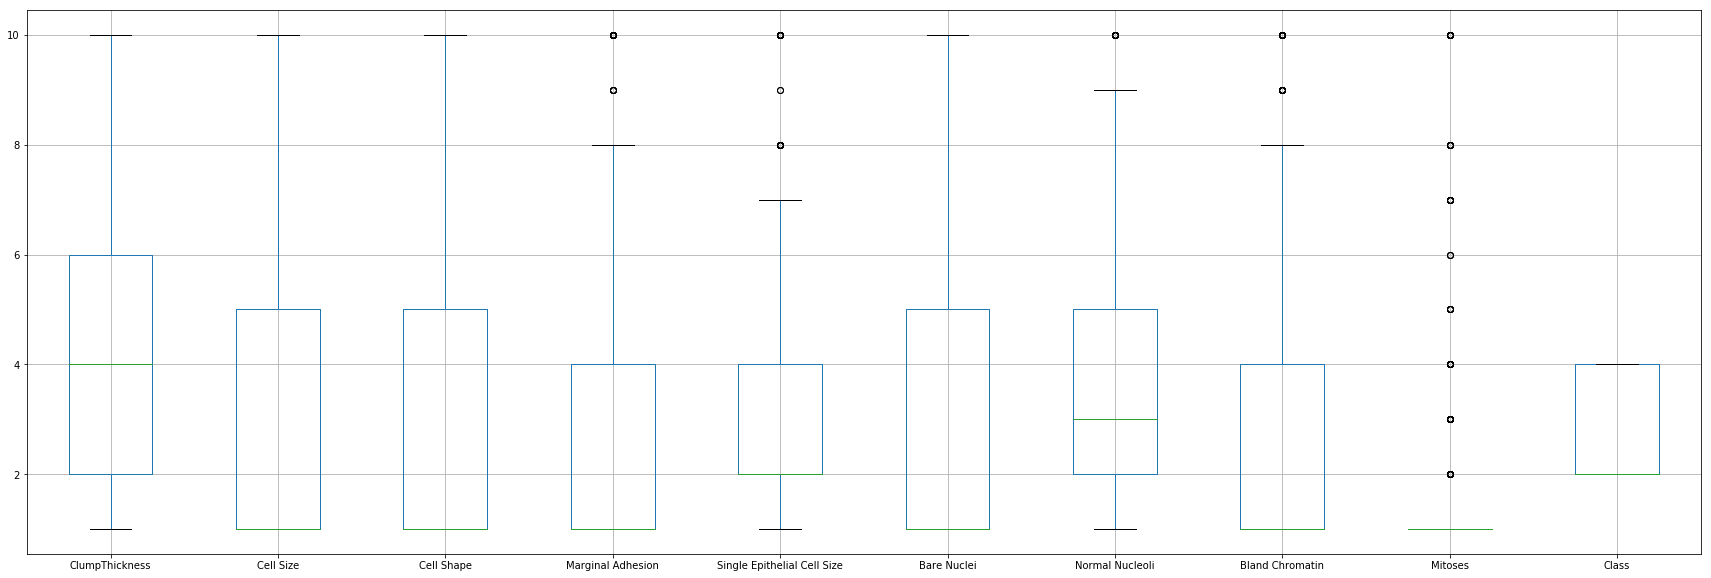

In [29]:
data.boxplot(figsize = (30,10))

In [30]:
for i in data.columns:
    print('\n')
    print(pd.crosstab(data[i],data['Class']))



Class             2   4
ClumpThickness         
1               139   3
2                46   4
3                94  11
4                68  12
5                84  45
6                16  17
7                 1  22
8                 4  42
9                 0  13
10                0  69


Class        2   4
Cell Size         
1          374   4
2           37   8
3           27  24
4            9  31
5            0  30
6            2  25
7            1  18
8            1  28
9            1   5
10           0  65


Class         2   4
Cell Shape         
1           345   2
2            52   7
3            33  23
4            13  31
5             3  30
6             3  27
7             2  28
8             1  27
9             0   7
10            0  56


Class                2   4
Marginal Adhesion         
1                  369  31
2                   37  19
3                   31  27
4                    5  28
5                    4  19
6                    4  18
7                   

In [31]:
data['Marginal Adhesion']=np.where(data['Marginal Adhesion'] > 8, 8, data['Marginal Adhesion'])
data['Single Epithelial Cell Size']=np.where(data['Single Epithelial Cell Size'] > 7, 7, data['Single Epithelial Cell Size'])
data['Normal Nucleoli']=np.where(data['Normal Nucleoli'] > 9, 9, data['Normal Nucleoli'])
data['Bland Chromatin']=np.where(data['Bland Chromatin'] > 8, 8, data['Bland Chromatin'])
data['Mitoses']=np.where(data['Mitoses'] > 2, 2, data['Mitoses'])

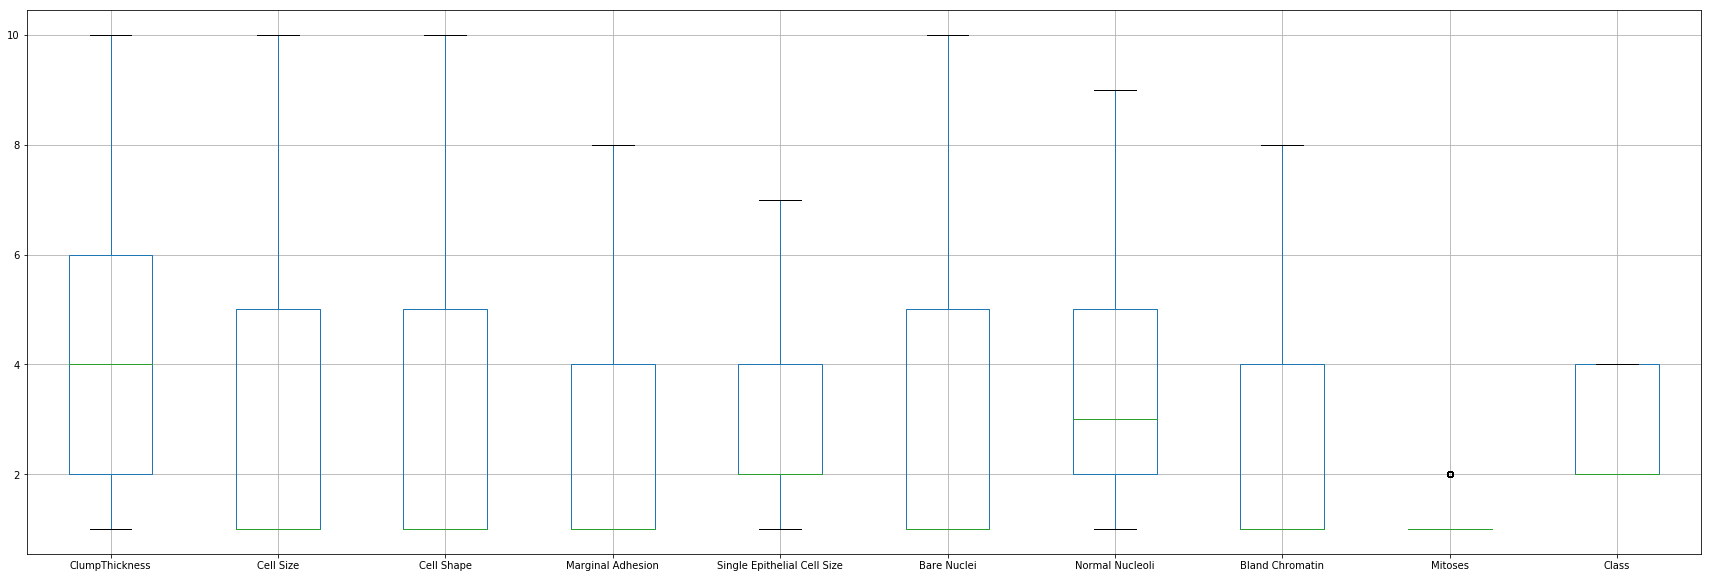

In [32]:
data.boxplot(figsize = (30,10))

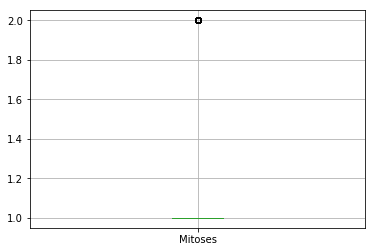

In [33]:
data.boxplot('Mitoses')

In [34]:
pd.crosstab(data['Mitoses'],data['Class'])

Class,2,4
Mitoses,,
1,439,132
2,13,106


In [35]:
data=data.drop('Class',axis=1)

In [36]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(data)

C:\Users\PratikDiablo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PratikDiablo\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q6 Create a covariance matrix for identifying Principal components

In [37]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.50566766 0.54660373 0.59150555
  0.56762194 0.54895554 0.44343056]
 [0.64410677 1.00145138 0.9066632  0.73190433 0.78174972 0.68556472
  0.76060761 0.7322064  0.49299528]
 [0.65453792 0.9066632  1.00145138 0.70664526 0.75160088 0.70518656
  0.73975369 0.72768806 0.46444631]
 [0.50566766 0.73190433 0.70664526 1.00145138 0.66784054 0.68919517
  0.68896322 0.6334195  0.44883871]
 [0.54660373 0.78174972 0.75160088 0.66784054 1.00145138 0.6263289
  0.66056222 0.68990315 0.47431449]
 [0.59150555 0.68556472 0.70518656 0.68919517 0.6263289  1.00145138
  0.68161737 0.60106392 0.46616061]
 [0.56762194 0.76060761 0.73975369 0.68896322 0.66056222 0.68161737
  1.00145138 0.6803516  0.39493876]
 [0.54895554 0.7322064  0.72768806 0.6334195  0.68990315 0.60106392
  0.6803516  1.00145138 0.49811301]
 [0.44343056 0.49299528 0.46444631 0.44883871 0.47431449 0.46616061
  0.39493876 0.49811301 1.00145138]]


# Q7 Identify eigen values and eigen vector

In [38]:
# Step 2- Get eigen values and eigen vector

In [39]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.30026298  0.13779702 -0.87272271  0.00810817  0.07897684 -0.02376884
  -0.19438327  0.25065273  0.14740933]
 [-0.37381385 -0.12690801  0.01864274  0.73767763  0.21157741 -0.2125259
   0.34571741 -0.2518772   0.16354457]
 [-0.36965725 -0.15135672 -0.05699694 -0.65846244  0.18870425 -0.18267933
   0.5228656  -0.24105252  0.0561021 ]
 [-0.3356105  -0.13918396  0.30485932 -0.05219224 -0.43469583 -0.18852959
  -0.03299712  0.52478238  0.52090397]
 [-0.34295692 -0.06487088  0.22534458 -0.07235616  0.32327874 -0.5114311
  -0.56888099  0.03338    -0.3624169 ]
 [-0.33293395 -0.04125069 -0.10407837  0.08567594 -0.65458651  0.04048845
   0.15311739 -0.03380833 -0.64387105]
 [-0.3423679  -0.26344375  0.04301037 -0.06685406 -0.12357222  0.49759044
  -0.44937969 -0.52616498  0.2557425 ]
 [-0.3370778   0.01969008  0.20639897  0.03273396  0.41415147  0.61191381
   0.13840153  0.47337377 -0.23048025]
 [-0.24803785  0.92028536  0.18909457 -0.03677507 -0.06814486  0.01080713
  -0.0

# Q8 Find variance and cumulative variance by each eigen vector

In [40]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance',var_exp)
print('\n')
print("Cumulative Variance Explained", cum_var_exp)

Explained Variance [67.50552115622847, 7.753925447697786, 5.872834652370986, 4.998025946327862, 3.757005716864617, 3.201963782377078, 3.1195026378126856, 2.7996367626058545, 0.9915838977146566]


Cumulative Variance Explained [ 67.50552116  75.2594466   81.13228126  86.1303072   89.88731292
  93.0892767   96.20877934  99.0084161  100.        ]


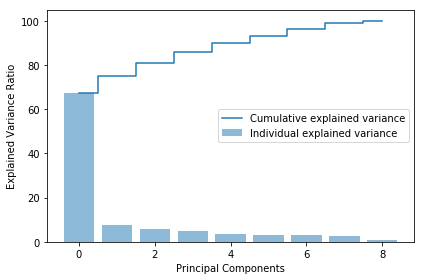

In [41]:
plt.figure(figsize=(6 , 4))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [42]:
# NOTE - we are generating only 5 PCA dimensions (dimensionality reduction from 9 to 5)

pca = PCA(n_components=5)
data_reduced = pca.fit_transform(X_std)
data_reduced.transpose()

array([[-1.52161586e+00,  1.69086453e+00, -1.64280899e+00, ...,
         4.40960804e+00,  2.24103946e+00,  2.65647886e+00],
       [ 2.43475293e-03, -7.79718330e-01, -1.06868277e-01, ...,
         7.80036663e-01, -1.46383216e+00, -1.68539533e+00],
       [-6.39933665e-01,  2.69445280e-01, -4.87511342e-02, ...,
         1.20763027e+00,  5.27806085e-01,  5.54251866e-01],
       [ 6.37703264e-02, -7.96690985e-01, -1.73437476e-01, ...,
         2.12473391e+00,  4.28141666e-01,  6.73652404e-02],
       [-1.99953727e-01,  1.61243132e+00, -2.28040839e-01, ...,
        -1.44542434e-01, -1.34845594e+00, -4.06075817e-01]])

# Q10 Find correlation between components and features

In [43]:
# Loadings or Eigen vectors on the PCA components
pca.components_

array([[ 0.30026298,  0.37381385,  0.36965725,  0.3356105 ,  0.34295692,
         0.33293395,  0.3423679 ,  0.3370778 ,  0.24803785],
       [ 0.13779702, -0.12690801, -0.15135672, -0.13918396, -0.06487088,
        -0.04125069, -0.26344375,  0.01969008,  0.92028536],
       [-0.87272271,  0.01864274, -0.05699694,  0.30485932,  0.22534458,
        -0.10407837,  0.04301037,  0.20639897,  0.18909457],
       [ 0.07897684,  0.21157741,  0.18870425, -0.43469583,  0.32327874,
        -0.65458651, -0.12357222,  0.41415147, -0.06814486],
       [ 0.02376884,  0.2125259 ,  0.18267933,  0.18852959,  0.5114311 ,
        -0.04048845, -0.49759044, -0.61191381, -0.01080713]])

C:\Users\PratikDiablo\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


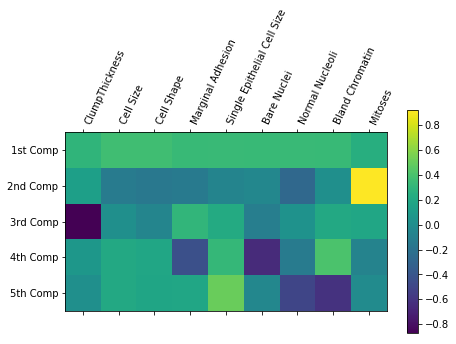

In [44]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(data.columns)),data.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [45]:
jokes = pd.read_csv("jokes.csv")  
jokes.head()  

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [46]:
jokes.shape

(24983, 101)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [47]:
ratings=jokes.iloc[:200,1:]
ratings.shape

(200, 100)

In [48]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 Change the column indices from 0 to 99

In [49]:
jokes.columns

Index(['NumJokes', 'Joke1', 'Joke2', 'Joke3', 'Joke4', 'Joke5', 'Joke6',
       'Joke7', 'Joke8', 'Joke9',
       ...
       'Joke91', 'Joke92', 'Joke93', 'Joke94', 'Joke95', 'Joke96', 'Joke97',
       'Joke98', 'Joke99', 'Joke100'],
      dtype='object', length=101)

In [50]:
# The columns are already named

# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [51]:
ratings.replace(99.00, 0,inplace=True)

In [52]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [53]:
t=ratings.T

In [54]:
ratings_diff= pd.DataFrame(StandardScaler().fit_transform(t))#,columns=ratings.columns)
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.927207,0.274579,-0.787867,-0.347962,1.306203,-0.423210,-0.603155,1.773646,-0.758792,-0.095735,...,0.884909,1.148536,1.297058,-0.136464,-1.445881,1.103062,0.042798,1.248994,-0.307334,0.914680
1,1.989411,-0.625106,-0.787867,1.929242,0.389048,0.451617,-0.603155,1.066256,-0.695466,0.640424,...,-2.049789,-0.178823,0.136746,-0.819878,-1.140605,-0.908633,1.191985,-1.225676,-0.307334,-1.890658
2,-1.250300,0.743980,-0.787867,-0.347962,-1.681034,1.775498,-0.603155,2.221531,-2.184883,0.640424,...,-1.493801,0.316800,0.197152,0.476425,-1.151059,-1.112260,2.046672,-0.214188,-0.307334,-1.297305
3,-0.986909,0.334284,-0.787867,-0.347962,-1.968676,-1.198246,-0.603155,-0.734897,-1.544028,-0.095735,...,-0.129625,-0.551965,-1.073906,0.476425,0.036591,-0.294241,-0.565406,0.067638,-0.307334,0.279879
4,-0.874529,-1.055391,1.257275,0.142932,-0.377212,-0.729233,1.835009,-1.109737,-2.012637,1.073864,...,-2.468213,-1.383700,0.257559,0.288360,-1.282788,0.095459,1.006322,-0.156279,1.921319,1.307340


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [55]:
t_back=ratings_diff.T

In [56]:
mean=pd.DataFrame(t_back.mean())

In [57]:
#mean after normalising the dataset
mean[0].sort_values(ascending=False).head(10)

49    0.878217
35    0.751972
52    0.736700
34    0.692304
28    0.664230
26    0.609724
61    0.557550
48    0.532007
31    0.521891
30    0.502491
Name: 0, dtype: float64

In [58]:
#mean without normalising the dataset
mean=pd.DataFrame(ratings.mean())
mean[0].sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
Name: 0, dtype: float64